In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('USA_Housing.csv')

In [3]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
dataset.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
dataset.shape

(5000, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
X=dataset [['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
              'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataset['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regressor.intercept_)
print(regressor.coef_)

-2646630.5310581373
[2.16604083e+01 1.65809651e+05 1.20329408e+05 2.19309558e+03
 1.52858855e+01]


In [14]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Avg. Area Income,21.660408
Avg. Area House Age,165809.651149
Avg. Area Number of Rooms,120329.407877
Avg. Area Number of Bedrooms,2193.095579
Area Population,15.285885


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(30)

In [17]:
df1

,Actual,Predicted
398,8.942511e+05,9.713052e+05
3833,9.329794e+05,9.547172e+05
4836,9.207479e+05,9.075616e+05
4572,6.918549e+05,4.932514e+05
636,7.327332e+05,7.178465e+05
2545,9.452522e+05,1.050148e+06
1161,6.244828e+05,7.127497e+05
2230,8.495661e+05,7.867304e+05
148,1.544380e+06,1.804401e+06
2530,1.535262e+06,1.538825e+06


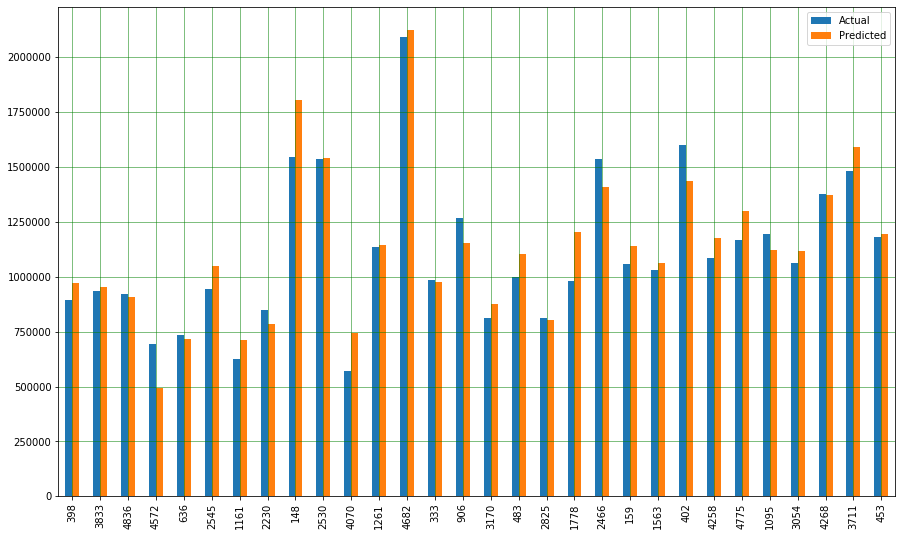

In [18]:
df1.plot(kind='bar',figsize=(15,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82657.94605893594
Mean Squared Error: 10549721686.164171
Root Mean Squared Error: 102711.83810138036


In [20]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test.to_numpy().reshape(-1,1), y_pred.reshape(-1,1)))

r2_score 0.9146454505137673
